# Using a combination of 3 3D datasets (Fermi-LAT, HESS and HAWC) and 2 1D dataset (MAGIC, CTA-LST1)
## This includes datasets with global and energy-dependent directional cuts,
## using DL3/5 files produced using GADF-compliant and other formats

In [1]:
import logging
import os

import astropy.units as u
import matplotlib.pyplot as plt
from gammapy.modeling.models import Models

from asgardpy.analysis import AsgardpyAnalysis
from asgardpy.config import AsgardpyConfig
from asgardpy.data.target import apply_selection_mask_to_models, set_models

In [2]:
# os.environ['GAMMAPY_DATA']

In [3]:
log = logging.getLogger("test DL4 steps")

In [4]:
config_file = "../src/asgardpy/tests/config_crab_mult_instruments.yaml"

In [5]:
config = AsgardpyConfig()

In [6]:
%%time
config_main = config.read(config_file)

CPU times: user 18.4 ms, sys: 34 μs, total: 18.5 ms
Wall time: 17.9 ms


# Update path of test data

In [7]:
config_main.dataset3d.instruments[0].input_dl3[0].input_dir = f"{os.environ['GAMMAPY_DATA']}fermipy-crab/"
config_main.dataset3d.instruments[0].input_dl3[1].input_dir = f"{os.environ['GAMMAPY_DATA']}fermipy-crab/"
config_main.dataset3d.instruments[1].input_dl3[0].input_dir = f"{os.environ['GAMMAPY_DATA']}hess-dl3-dr1/"
config_main.dataset3d.instruments[
    1
].dataset_info.background.exclusion.exclusion_file = (
    f"{os.environ['GAMMAPY_DATA']}joint-crab/exclusion/exclusion_mask_crab.fits.gz/"
)
config_main.dataset3d.instruments[2].input_dl3[
    0
].input_dir = f"{os.environ['GAMMAPY_DATA']}hawc/crab_events_pass4/"

config_main.dataset1d.instruments[0].input_dl3[0].input_dir = f"{os.environ['GAMMAPY_DATA']}magic/rad_max/data/"
config_main.dataset1d.instruments[
    1
].dl4_dataset_info.dl4_dataset.input_dir = f"{os.environ['GAMMAPY_DATA']}cta-lst1/"

In [8]:
config_main.general.model_dump()

{'log': {'level': 'info',
  'filename': '',
  'filemode': 'w',
  'format': '',
  'datefmt': ''},
 'outdir': PosixPath('.'),
 'n_jobs': 20,
 'parallel_backend': 'multiprocessing',
 'steps': ['datasets-3d', 'datasets-1d', 'fit', 'flux-points'],
 'overwrite': True,
 'stacked_dataset': True}

# Steps mentioned in the main config file

In [9]:
config_main.general.steps

['datasets-3d', 'datasets-1d', 'fit', 'flux-points']

In [10]:
config_main.target.model_dump()

{'source_name': '4FGL J0534.5+2201i',
 'sky_position': {'frame': 'icrs',
  'lon': <Quantity 83.63308333 deg>,
  'lat': <Quantity 22.0145 deg>,
  'radius': <Quantity 0. deg>},
 'use_uniform_position': True,
 'models_file': PosixPath('.'),
 'datasets_with_fov_bkg_model': [],
 'use_catalog': {'name': '',
  'selection_radius': <Quantity 0. deg>,
  'exclusion_radius': <Quantity 0. deg>},
 'components': [{'name': '4FGL J0534.5+2201i',
   'type': 'SkyModel',
   'datasets_names': [''],
   'spectral': {'type': 'LogParabolaSpectralModel',
    'parameters': [{'name': 'amplitude',
      'value': 1e-06,
      'unit': 'cm-2 s-1 TeV-1',
      'error': 1.5e-07,
      'min': 1e-13,
      'max': 0.0001,
      'frozen': False},
     {'name': 'reference',
      'value': 0.05,
      'unit': 'TeV',
      'error': 0.0,
      'min': 0.0001,
      'max': 100.0,
      'frozen': True},
     {'name': 'alpha',
      'value': 1.7,
      'unit': '',
      'error': 0.1,
      'min': 0.5,
      'max': 3.0,
      'froz

# Datasets informations

In [11]:
config_main.dataset3d.model_dump()

{'type': '3d',
 'instruments': [{'name': 'Fermi-LAT',
   'input_dl3': [{'type': 'lat',
     'input_dir': PosixPath('/home/chaitanya/software/gammapy-datasets/1.3/fermipy-crab'),
     'glob_pattern': {'events': 'ft1*.fits*',
      'edisp': 'drm*.fits*',
      'xml_model': 'srcmdl*.xml',
      'exposure': 'bexpmap*.fits*',
      'psf': 'psf*.fits*'}},
    {'type': 'lat-aux',
     'input_dir': PosixPath('/home/chaitanya/software/gammapy-datasets/1.3/fermipy-crab'),
     'glob_pattern': {'gal_diffuse': 'gll_iem_v07_cutout.fits*',
      'iso_diffuse': 'iso_P8R3_SOURCE_V3_*.txt'}}],
   'input_dl4': False,
   'dataset_info': {'name': 'Fermi-LAT',
    'key': ['00', '01'],
    'observation': {'obs_ids': [],
     'event_type': [],
     'obs_file': PosixPath('.'),
     'obs_time': [],
     'obs_cone': {'frame': 'icrs',
      'lon': <Quantity 0. deg>,
      'lat': <Quantity 0. deg>,
      'radius': <Quantity 0. deg>},
     'required_irfs': ['aeff']},
    'map_selection': ['counts', 'exposure', 'ba

In [12]:
config_main.dataset1d.model_dump()

{'type': '1d',
 'instruments': [{'name': 'MAGIC',
   'input_dl3': [{'type': 'gadf-dl3',
     'input_dir': PosixPath('/home/chaitanya/software/gammapy-datasets/1.3/magic/rad_max/data'),
     'glob_pattern': {'dl3_files': '2013*fits'}}],
   'input_dl4': False,
   'dataset_info': {'name': 'MAGIC',
    'geom': {'wcs': {'skydir': {'frame': 'icrs',
       'lon': <Quantity 0. deg>,
       'lat': <Quantity 0. deg>,
       'radius': <Quantity 0. deg>},
      'binsize': <Quantity 0.02 deg>,
      'proj': 'TAN',
      'map_frame_shape': {'width': <Quantity 6. deg>,
       'height': <Quantity 6. deg>},
      'binsize_irf': <Quantity 0.2 deg>},
     'selection': {'offset_max': <Quantity 2.5 deg>},
     'axes': [{'name': 'energy',
       'axis': {'min': <Quantity 0.05 TeV>,
        'max': <Quantity 10. TeV>,
        'nbins': 5,
        'per_decade': True},
       'axis_custom': {'edges': [], 'unit': 'TeV'}},
      {'name': 'energy_true',
       'axis': {'min': <Quantity 0.01 TeV>,
        'max': <Qu

# DL4 step information

In [13]:
config_main.fit_params.model_dump()

{'fit_range': {'min': <Quantity 1. GeV>, 'max': <Quantity 31.6 TeV>},
 'backend': 'minuit',
 'optimize_opts': {},
 'covariance_opts': {},
 'confidence_opts': {},
 'store_trace': True}

In [14]:
config_main.flux_points_params.model_dump()

{'parameters': {'selection_optional': 'all'}, 'reoptimize': False}

# Analysis object

In [15]:
%%time
analysis = AsgardpyAnalysis(config_main)

Setting logging config: {'level': 'INFO', 'filename': '', 'filemode': 'w', 'format': '', 'datefmt': ''}


CPU times: user 899 μs, sys: 0 ns, total: 899 μs
Wall time: 744 μs


# Run each Dataset nD Generation step

In [16]:
%%time
analysis.run(["datasets-3d"])

Perform DL3 to DL4 process!
3 number of 3D Datasets given
The different keys used: 00 01
Selecting the file with name containing 00
Selecting the file with name containing 00
Selecting the file with name containing 00
Selecting the file with name containing 00
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
Set MJD-OBS to 58484.000000 from DATE-OBS.
Set MJD-END to 59729.988334 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 58484.000000 from DATE-OBS.
Set MJD-END to 59729.988334 from DATE-END'.
Using the exclusion mask to create a safe mask
Selecting the file with name containing 01
Selecting the file with name containing 01
Selecting the file with name containing 01
Selecting the file with name containing 01
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
Set MJD-OBS to 58484.000000 from DATE-OBS.
Set MJD-END to 59729.988334 from DATE-END'. [astr

CPU times: user 13.1 s, sys: 483 ms, total: 13.6 s
Wall time: 14.2 s


## Display some results

In [17]:
print(analysis.datasets)

Datasets
--------

Dataset 0: 

  Type       : MapDataset
  Name       : Fermi-LAT_00
  Instrument : 
  Models     : ['4FGL J0534.5+2201i', '4FGL J0534.5+2201s', '4FGL J0534.5+2200', '4FGL J0526.3+2246', '4FGL J0544.4+2238', '4FGL J0528.3+1817', '4FGL J0536.2+1733', '4FGL J0540.3+2756e', 'fermi-diffuse-iso-00', 'diffuse-iem']

Dataset 1: 

  Type       : MapDataset
  Name       : Fermi-LAT_01
  Instrument : 
  Models     : ['4FGL J0534.5+2201i', '4FGL J0534.5+2201s', '4FGL J0534.5+2200', '4FGL J0526.3+2246', '4FGL J0544.4+2238', '4FGL J0528.3+1817', '4FGL J0536.2+1733', '4FGL J0540.3+2756e', 'diffuse-iem', 'fermi-diffuse-iso-01']

Dataset 2: 

  Type       : MapDataset
  Name       : HESS
  Instrument : 
  Models     : ['4FGL J0534.5+2201i']

Dataset 3: 

  Type       : MapDataset
  Name       : HAWC_fHit-5
  Instrument : HAWC
  Models     : ['4FGL J0534.5+2201i']

Dataset 4: 

  Type       : MapDataset
  Name       : HAWC_fHit-6
  Instrument : HAWC
  Models     : ['4FGL J0534.5+2201i'

In [18]:
print(analysis.final_model)

Models

Component 0: SkyModel

  Name                      : 4FGL J0534.5+2201i
  Datasets names            : ['Fermi-LAT_00', 'Fermi-LAT_01', 'HESS', 'HAWC_fHit-5', 'HAWC_fHit-6', 'HAWC_fHit-7', 'HAWC_fHit-8', 'HAWC_fHit-9']
  Spectral model type       : CompoundSpectralModel
  Spatial  model type       : GaussianSpatialModel
  Temporal model type       : 
  Parameters:
    amplitude                     :   1.00e-06   +/- 1.5e-07 1 / (TeV s cm2)
    reference             (frozen):      0.050       TeV         
    alpha                         :      1.700   +/-    0.10             
    beta                          :      0.010   +/-    0.00             
    alpha_norm            (frozen):      1.000                   
    redshift              (frozen):      0.000                   
    lon_0                 (frozen):    184.553       deg         
    lat_0                 (frozen):     -5.781       deg         
    sigma                 (frozen):      0.020       deg         
    e

In [19]:
for m in analysis.final_model:
    print(m)

SkyModel

  Name                      : 4FGL J0534.5+2201i
  Datasets names            : ['Fermi-LAT_00', 'Fermi-LAT_01', 'HESS', 'HAWC_fHit-5', 'HAWC_fHit-6', 'HAWC_fHit-7', 'HAWC_fHit-8', 'HAWC_fHit-9']
  Spectral model type       : CompoundSpectralModel
  Spatial  model type       : GaussianSpatialModel
  Temporal model type       : 
  Parameters:
    amplitude                     :   1.00e-06   +/- 1.5e-07 1 / (TeV s cm2)
    reference             (frozen):      0.050       TeV         
    alpha                         :      1.700   +/-    0.10             
    beta                          :      0.010   +/-    0.00             
    alpha_norm            (frozen):      1.000                   
    redshift              (frozen):      0.000                   
    lon_0                 (frozen):    184.553       deg         
    lat_0                 (frozen):     -5.781       deg         
    sigma                 (frozen):      0.020       deg         
    e                     

In [20]:
print(analysis.instrument_spectral_info)

{'name': ['Fermi-LAT', 'HESS', 'HAWC'], 'spectral_energy_ranges': [<Quantity [  1.        ,   2.87298483,   8.25404185,  23.71373706,
            68.12920691, 195.73417815, 562.34132519] GeV>, <Quantity [ 1.        ,  1.58489319,  2.51188643,  3.98107171,  6.30957344,
           10.        ] TeV>, <Quantity [ 3.16      ,  5.61936294,  9.99279741, 17.76998588, 31.6       ] TeV>], 'en_bins': 108, 'free_params': 6, 'DoF': 102}


In [21]:
print(analysis.dataset_name_list)

['Fermi-LAT_00', 'Fermi-LAT_01', 'HESS', 'HAWC_fHit-5', 'HAWC_fHit-6', 'HAWC_fHit-7', 'HAWC_fHit-8', 'HAWC_fHit-9']


In [22]:
%%time
analysis.run(["datasets-1d"])

Perform DL3 to DL4 process!
2 number of 1D Datasets given
Observation ID list selected: 5029747 5029748
Observations selected: 2 out of 2.
Using 2 processes to compute Data reduction
Computing dataset for observation 5029747
Running SpectrumDatasetMaker
Computing dataset for observation 5029748
Running SpectrumDatasetMaker
'THETA' axis is stored as a scalar -- converting to 1D array.
'THETA' axis is stored as a scalar -- converting to 1D array.
'THETA' axis is stored as a scalar -- converting to 1D array.
'THETA' axis is stored as a scalar -- converting to 1D array.
'THETA' axis is stored as a scalar -- converting to 1D array.
'THETA' axis is stored as a scalar -- converting to 1D array.
'THETA' axis is stored as a scalar -- converting to 1D array.
'THETA' axis is stored as a scalar -- converting to 1D array.
'THETA' axis is stored as a scalar -- converting to 1D array.
'THETA' axis is stored as a scalar -- converting to 1D array.
'THETA' axis is stored as a scalar -- converting to 1D 

CPU times: user 1.5 s, sys: 66.3 ms, total: 1.57 s
Wall time: 1.75 s


## Display the results

In [23]:
print(analysis.datasets)

Datasets
--------

Dataset 0: 

  Type       : MapDataset
  Name       : Fermi-LAT_00
  Instrument : 
  Models     : ['4FGL J0534.5+2201i', '4FGL J0534.5+2201s', '4FGL J0534.5+2200', '4FGL J0526.3+2246', '4FGL J0544.4+2238', '4FGL J0528.3+1817', '4FGL J0536.2+1733', '4FGL J0540.3+2756e', 'fermi-diffuse-iso-00', 'diffuse-iem']

Dataset 1: 

  Type       : MapDataset
  Name       : Fermi-LAT_01
  Instrument : 
  Models     : ['4FGL J0534.5+2201i', '4FGL J0534.5+2201s', '4FGL J0534.5+2200', '4FGL J0526.3+2246', '4FGL J0544.4+2238', '4FGL J0528.3+1817', '4FGL J0536.2+1733', '4FGL J0540.3+2756e', 'diffuse-iem', 'fermi-diffuse-iso-01']

Dataset 2: 

  Type       : MapDataset
  Name       : HESS
  Instrument : 
  Models     : ['4FGL J0534.5+2201i']

Dataset 3: 

  Type       : MapDataset
  Name       : HAWC_fHit-5
  Instrument : HAWC
  Models     : ['4FGL J0534.5+2201i']

Dataset 4: 

  Type       : MapDataset
  Name       : HAWC_fHit-6
  Instrument : HAWC
  Models     : ['4FGL J0534.5+2201i'

In [24]:
for d in analysis.datasets:
    print(d)

/home/chaitanya/mambaforge/envs/asgardpy/lib/python3.12/site-packages/gammapy/utils/interpolation.py:200: RuntimeWarning: overflow encountered in exp
  output = np.exp(values)


MapDataset
----------

  Name                            : Fermi-LAT_00 

  Total counts                    : 23266 
  Total background counts         : nan
  Total excess counts             : nan

  Predicted counts                : 82540.16
  Predicted background counts     : nan
  Predicted excess counts         : 82540.16

  Exposure min                    : 5.80e+10 cm2 s
  Exposure max                    : 7.19e+10 cm2 s

  Number of total bins            : 1182816 
  Number of fit bins              : 186744 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : 100540.15

  Number of models                : 10 
  Number of parameters            : 59
  Number of free parameters       : 8

  Component 0: SkyModel
  
    Name                      : 4FGL J0534.5+2201i
    Datasets names            : ['Fermi-LAT_00', 'Fermi-LAT_01', 'HESS', 'HAWC_fHit-5', 'HAWC_fHit-6', 'HAWC_fHit-7', 'HAWC_fHit-8', 'HAWC_fHit-9', 'MAGIC', 'LST-1']
    Spectral model type     

/home/chaitanya/mambaforge/envs/asgardpy/lib/python3.12/site-packages/gammapy/utils/interpolation.py:200: RuntimeWarning: overflow encountered in exp
  output = np.exp(values)


MapDataset
----------

  Name                            : Fermi-LAT_01 

  Total counts                    : 22981 
  Total background counts         : nan
  Total excess counts             : nan

  Predicted counts                : 80084.69
  Predicted background counts     : nan
  Predicted excess counts         : 80084.69

  Exposure min                    : 4.52e+10 cm2 s
  Exposure max                    : 6.50e+10 cm2 s

  Number of total bins            : 1182816 
  Number of fit bins              : 186744 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : 119520.47

  Number of models                : 10 
  Number of parameters            : 59
  Number of free parameters       : 8

  Component 0: SkyModel
  
    Name                      : 4FGL J0534.5+2201i
    Datasets names            : ['Fermi-LAT_00', 'Fermi-LAT_01', 'HESS', 'HAWC_fHit-5', 'HAWC_fHit-6', 'HAWC_fHit-7', 'HAWC_fHit-8', 'HAWC_fHit-9', 'MAGIC', 'LST-1']
    Spectral model type     

In [25]:
for m in analysis.final_model:
    print(m)

SkyModel

  Name                      : 4FGL J0534.5+2201i
  Datasets names            : ['Fermi-LAT_00', 'Fermi-LAT_01', 'HESS', 'HAWC_fHit-5', 'HAWC_fHit-6', 'HAWC_fHit-7', 'HAWC_fHit-8', 'HAWC_fHit-9', 'MAGIC', 'LST-1']
  Spectral model type       : CompoundSpectralModel
  Spatial  model type       : GaussianSpatialModel
  Temporal model type       : 
  Parameters:
    amplitude                     :   1.00e-06   +/- 1.5e-07 1 / (TeV s cm2)
    reference             (frozen):      0.050       TeV         
    alpha                         :      1.700   +/-    0.10             
    beta                          :      0.010   +/-    0.00             
    alpha_norm            (frozen):      1.000                   
    redshift              (frozen):      0.000                   
    lon_0                 (frozen):    184.553       deg         
    lat_0                 (frozen):     -5.781       deg         
    sigma                 (frozen):      0.020       deg         
    e   

In [26]:
print(analysis.instrument_spectral_info)

{'name': ['Fermi-LAT', 'HESS', 'HAWC', 'MAGIC', 'LST-1'], 'spectral_energy_ranges': [<Quantity [  1.        ,   2.87298483,   8.25404185,  23.71373706,
            68.12920691, 195.73417815, 562.34132519] GeV>, <Quantity [ 1.        ,  1.58489319,  2.51188643,  3.98107171,  6.30957344,
           10.        ] TeV>, <Quantity [ 3.16      ,  5.61936294,  9.99279741, 17.76998588, 31.6       ] TeV>, <Quantity [0.0631, 0.1   , 0.1585, 0.2512, 0.3981, 0.631 , 1.    , 1.585 ,
           2.512 ] TeV>, <Quantity [2.510e-02, 3.980e-02, 6.310e-02, 1.000e-01, 1.585e-01,
           2.512e-01, 3.981e-01, 6.310e-01, 1.000e+00, 1.585e+00,
           2.512e+00, 3.981e+00, 6.310e+00, 1.000e+01, 1.585e+01,
           2.512e+01] TeV>], 'en_bins': 140, 'free_params': 15, 'DoF': 125}


In [27]:
for i, en_range in enumerate(analysis.instrument_spectral_info["spectral_energy_ranges"]):
    print(
        f"The spectral energy range to be used for dataset {analysis.instrument_spectral_info['name'][i]} is {en_range}"
    )

The spectral energy range to be used for dataset Fermi-LAT is [  1.           2.87298483   8.25404185  23.71373706  68.12920691
 195.73417815 562.34132519] GeV
The spectral energy range to be used for dataset HESS is [ 1.          1.58489319  2.51188643  3.98107171  6.30957344 10.        ] TeV
The spectral energy range to be used for dataset HAWC is [ 3.16        5.61936294  9.99279741 17.76998588 31.6       ] TeV
The spectral energy range to be used for dataset MAGIC is [0.0631 0.1    0.1585 0.2512 0.3981 0.631  1.     1.585  2.512 ] TeV
The spectral energy range to be used for dataset LST-1 is [2.510e-02 3.980e-02 6.310e-02 1.000e-01 1.585e-01 2.512e-01 3.981e-01
 6.310e-01 1.000e+00 1.585e+00 2.512e+00 3.981e+00 6.310e+00 1.000e+01
 1.585e+01 2.512e+01] TeV


In [28]:
print(analysis.dataset_name_list)

['Fermi-LAT_00', 'Fermi-LAT_01', 'HESS', 'HAWC_fHit-5', 'HAWC_fHit-6', 'HAWC_fHit-7', 'HAWC_fHit-8', 'HAWC_fHit-9', 'MAGIC', 'LST-1']


In [29]:
for d in analysis.datasets:
    print(d.name)

Fermi-LAT_00
Fermi-LAT_01
HESS
HAWC_fHit-5
HAWC_fHit-6
HAWC_fHit-7
HAWC_fHit-8
HAWC_fHit-9
MAGIC
LST-1


# Preparing the Datasets for DL4 steps

In [30]:
analysis.final_model = Models(analysis.final_model)

In [31]:
# Only updating the target source model with names of all datasets
if len(analysis.final_model) > 1:
    analysis.final_model = apply_selection_mask_to_models(
        list_sources=analysis.final_model,
        target_source=analysis.config.target.source_name,
        roi_radius=analysis.config.target.roi_selection.roi_radius,
        free_sources=analysis.config.target.roi_selection.free_sources,
    )

In [32]:
for model_ in analysis.final_model:
    print(model_)

SkyModel

  Name                      : 4FGL J0534.5+2201i
  Datasets names            : ['Fermi-LAT_00', 'Fermi-LAT_01', 'HESS', 'HAWC_fHit-5', 'HAWC_fHit-6', 'HAWC_fHit-7', 'HAWC_fHit-8', 'HAWC_fHit-9', 'MAGIC', 'LST-1']
  Spectral model type       : CompoundSpectralModel
  Spatial  model type       : GaussianSpatialModel
  Temporal model type       : 
  Parameters:
    amplitude                     :   1.00e-06   +/- 1.5e-07 1 / (TeV s cm2)
    reference             (frozen):      0.050       TeV         
    alpha                         :      1.700   +/-    0.10             
    beta                          :      0.010   +/-    0.00             
    alpha_norm            (frozen):      1.000                   
    redshift              (frozen):      0.000                   
    lon_0                 (frozen):    184.553       deg         
    lat_0                 (frozen):     -5.781       deg         
    sigma                 (frozen):      0.020       deg         
    e   

## Assigning the models to all the datasets

In [33]:
analysis.datasets, analysis.final_model = set_models(
    analysis.config.target,
    analysis.datasets,
    analysis.dataset_name_list,
    models=analysis.final_model,
)

In [34]:
%%time
for d in analysis.datasets:
    print(d)

/home/chaitanya/mambaforge/envs/asgardpy/lib/python3.12/site-packages/gammapy/utils/interpolation.py:200: RuntimeWarning: overflow encountered in exp
  output = np.exp(values)


MapDataset
----------

  Name                            : Fermi-LAT_00 

  Total counts                    : 23266 
  Total background counts         : nan
  Total excess counts             : nan

  Predicted counts                : 82540.16
  Predicted background counts     : nan
  Predicted excess counts         : 82540.16

  Exposure min                    : 5.80e+10 cm2 s
  Exposure max                    : 7.19e+10 cm2 s

  Number of total bins            : 1182816 
  Number of fit bins              : 186744 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : 100540.15

  Number of models                : 10 
  Number of parameters            : 59
  Number of free parameters       : 8

  Component 0: SkyModel
  
    Name                      : 4FGL J0534.5+2201i
    Datasets names            : ['Fermi-LAT_00', 'Fermi-LAT_01', 'HESS', 'HAWC_fHit-5', 'HAWC_fHit-6', 'HAWC_fHit-7', 'HAWC_fHit-8', 'HAWC_fHit-9', 'MAGIC', 'LST-1']
    Spectral model type     

/home/chaitanya/mambaforge/envs/asgardpy/lib/python3.12/site-packages/gammapy/utils/interpolation.py:200: RuntimeWarning: overflow encountered in exp
  output = np.exp(values)


MapDataset
----------

  Name                            : Fermi-LAT_01 

  Total counts                    : 22981 
  Total background counts         : nan
  Total excess counts             : nan

  Predicted counts                : 80084.69
  Predicted background counts     : nan
  Predicted excess counts         : 80084.69

  Exposure min                    : 4.52e+10 cm2 s
  Exposure max                    : 6.50e+10 cm2 s

  Number of total bins            : 1182816 
  Number of fit bins              : 186744 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : 119520.47

  Number of models                : 10 
  Number of parameters            : 59
  Number of free parameters       : 8

  Component 0: SkyModel
  
    Name                      : 4FGL J0534.5+2201i
    Datasets names            : ['Fermi-LAT_00', 'Fermi-LAT_01', 'HESS', 'HAWC_fHit-5', 'HAWC_fHit-6', 'HAWC_fHit-7', 'HAWC_fHit-8', 'HAWC_fHit-9', 'MAGIC', 'LST-1']
    Spectral model type     

In [35]:
len(list(analysis.final_model.parameters.free_parameters))

9

# Run the Fit step

In [36]:
%%time
analysis.run(["fit"])

Perform DL4 to DL5 processes!
OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 601
	total stat : 184385.02

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

Analysis Step fit completed
The Chi2/dof value of the goodness of Fit is 110.43/125
and the p-value is 8.205e-01 and in Significance 0.23 sigmas
with best fit TS (Observed) as -4403.787 and max fit TS (Expected) as -4514.217


CPU times: user 1min 49s, sys: 137 ms, total: 1min 49s
Wall time: 1min 49s


In [37]:
print(analysis.fit_result)

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 601
	total stat : 184385.02

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.



In [38]:
print(analysis.fit_result.total_stat)
analysis.fit_result.trace

184385.01573564566


total_stat,4FGL J0534.5+2201i.spectral.model1.amplitude,4FGL J0534.5+2201i.spectral.model1.alpha,4FGL J0534.5+2201i.spectral.model1.beta,4FGL J0534.5+2200.spectral.amplitude,4FGL J0528.3+1817.spectral.amplitude,4FGL J0536.2+1733.spectral.amplitude,fermi-diffuse-iso-00.spectral.model2.norm,diffuse-iem.spectral.norm
float64,float64,float64,float64,float64,float64,float64,float64,float64
1784723.7883439239,9.99999999999999e-07,1.7,0.009999999999999995,0.0007233944045970697,1.8360892725386581e-09,8.59814753661357e-08,1.0000000000000002,1.0000000000000002
1964174.2898334623,1.1005040745443024e-06,1.7,0.009999999999999995,0.0007233944045970697,1.8360892725386581e-09,8.59814753661357e-08,1.0000000000000002,1.0000000000000002
1615175.6213355516,9.042613189146535e-07,1.7,0.009999999999999995,0.0007233944045970697,1.8360892725386581e-09,8.59814753661357e-08,1.0000000000000002,1.0000000000000002
1802222.766566194,1.0098361223957622e-06,1.7,0.009999999999999995,0.0007233944045970697,1.8360892725386581e-09,8.59814753661357e-08,1.0000000000000002,1.0000000000000002
1767323.838427755,9.902115319211753e-07,1.7,0.009999999999999995,0.0007233944045970697,1.8360892725386581e-09,8.59814753661357e-08,1.0000000000000002,1.0000000000000002
1509274.287363845,9.99999999999999e-07,1.7653400535997852,0.009999999999999995,0.0007233944045970697,1.8360892725386581e-09,8.59814753661357e-08,1.0000000000000002,1.0000000000000002
2168064.168858445,9.99999999999999e-07,1.6347965910059592,0.009999999999999995,0.0007233944045970697,1.8360892725386581e-09,8.59814753661357e-08,1.0000000000000002,1.0000000000000002
1752782.6240706083,9.99999999999999e-07,1.7065308013923652,0.009999999999999995,0.0007233944045970697,1.8360892725386581e-09,8.59814753661357e-08,1.0000000000000002,1.0000000000000002
1817736.4014617677,9.99999999999999e-07,1.693470565361888,0.009999999999999995,0.0007233944045970697,1.8360892725386581e-09,8.59814753661357e-08,1.0000000000000002,1.0000000000000002


In [39]:
for m in analysis.datasets[0].models:
    print(m)

SkyModel

  Name                      : 4FGL J0534.5+2201i
  Datasets names            : ['Fermi-LAT_00', 'Fermi-LAT_01', 'HESS', 'HAWC_fHit-5', 'HAWC_fHit-6', 'HAWC_fHit-7', 'HAWC_fHit-8', 'HAWC_fHit-9', 'MAGIC', 'LST-1']
  Spectral model type       : CompoundSpectralModel
  Spatial  model type       : GaussianSpatialModel
  Temporal model type       : 
  Parameters:
    amplitude                     :   2.98e-08   +/- 7.9e-10 1 / (TeV s cm2)
    reference             (frozen):      0.050       TeV         
    alpha                         :      1.914   +/-    0.02             
    beta                          :      0.091   +/-    0.00             
    alpha_norm            (frozen):      1.000                   
    redshift              (frozen):      0.000                   
    lon_0                 (frozen):    184.553       deg         
    lat_0                 (frozen):     -5.781       deg         
    sigma                 (frozen):      0.020       deg         
    e   

# Run the Flux Points Estimator step

In [40]:
%%time
analysis.run(["flux-points"])

Perform DL4 to DL5 processes!
Using 20 processes to compute Energy bins
/home/chaitanya/mambaforge/envs/asgardpy/lib/python3.12/site-packages/gammapy/utils/interpolation.py:200: RuntimeWarning: overflow encountered in exp
  output = np.exp(values)
/home/chaitanya/mambaforge/envs/asgardpy/lib/python3.12/site-packages/gammapy/utils/interpolation.py:200: RuntimeWarning: overflow encountered in exp
  output = np.exp(values)
/home/chaitanya/mambaforge/envs/asgardpy/lib/python3.12/site-packages/gammapy/utils/interpolation.py:200: RuntimeWarning: overflow encountered in exp
  output = np.exp(values)
/home/chaitanya/mambaforge/envs/asgardpy/lib/python3.12/site-packages/gammapy/utils/interpolation.py:200: RuntimeWarning: overflow encountered in exp
  output = np.exp(values)
/home/chaitanya/mambaforge/envs/asgardpy/lib/python3.12/site-packages/gammapy/utils/interpolation.py:200: RuntimeWarning: overflow encountered in exp
  output = np.exp(values)
/home/chaitanya/mambaforge/envs/asgardpy/lib/pyt

CPU times: user 2.39 s, sys: 3.77 s, total: 6.16 s
Wall time: 24.1 s


In [41]:
for fp in analysis.flux_points:
    print(fp)

FluxPoints
----------

  geom                   : RegionGeom
  axes                   : ['lon', 'lat', 'energy']
  shape                  : (1, 1, 6)
  quantities             : ['norm', 'norm_err', 'norm_errn', 'norm_errp', 'norm_ul', 'ts', 'npred', 'npred_excess', 'stat', 'stat_null', 'stat_scan', 'counts', 'success']
  ref. model             : compound
  n_sigma                : 1
  n_sigma_ul             : 2
  sqrt_ts_threshold_ul   : 2
  sed type init          : likelihood

FluxPoints
----------

  geom                   : RegionGeom
  axes                   : ['lon', 'lat', 'energy']
  shape                  : (1, 1, 5)
  quantities             : ['norm', 'norm_err', 'norm_errn', 'norm_errp', 'norm_ul', 'ts', 'npred', 'npred_excess', 'stat', 'stat_null', 'stat_scan', 'counts', 'success']
  ref. model             : compound
  n_sigma                : 1
  n_sigma_ul             : 2
  sqrt_ts_threshold_ul   : 2
  sed type init          : likelihood

FluxPoints
----------

  geom     

In [42]:
fermi_fpt = analysis.flux_points[0].to_table(sed_type="e2dnde", formatted=True, format="gadf-sed")
fermi_fpt

e_ref,e_min,e_max,e2dnde,e2dnde_err,e2dnde_errp,e2dnde_errn,e2dnde_ul,ts,sqrt_ts,npred,npred_excess,stat,stat_null,stat_scan,is_ul,counts,success,norm_scan
TeV,TeV,TeV,TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),,,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[2],float32[2],float64,float64,float64[11],bool,float64[2],bool,float64[11]
0.002,0.001,0.003,1.747e-11,1.708e-12,1.713e-12,1.703e-12,2.090e-11,111.398,10.555,18399.919710172886 .. 18158.764983725672,678.9535 .. 669.08545,41093.443,41204.841,41158.027 .. 42993.884,False,18690.0 .. 18376.0,True,0.200 .. 5.000
0.005,0.003,0.007,4.332e-11,2.779e-12,2.796e-12,2.762e-12,4.896e-11,302.261,17.386,3465.33299832706 .. 3414.082092773445,470.32782 .. 462.51196,15446.827,15749.089,15645.477 .. 17124.863,False,3315.0 .. 3379.0,True,0.200 .. 5.000
0.013,0.007,0.024,5.929e-11,3.137e-12,3.170e-12,3.103e-12,6.570e-11,669.412,25.873,1105.3221507571445 .. 1033.0083615285296,327.7659 .. 305.55002,6882.112,7551.523,7246.973 .. 9065.325,False,973.0 .. 967.0,True,0.200 .. 5.000
0.042,0.024,0.075,7.006e-11,4.655e-12,4.750e-12,4.560e-12,7.975e-11,1052.741,32.446,234.4141722810322 .. 214.7968922155958,130.154 .. 119.25639,2249.784,3302.525,2560.819 .. 3485.274,False,215.0 .. 193.0,True,0.200 .. 5.000
0.115,0.075,0.178,6.826e-11,8.442e-12,8.789e-12,8.101e-12,8.655e-11,677.019,26.020,52.39355522593538 .. 45.34977491703049,35.532993 .. 30.772297,714.062,1391.081,808.400 .. 1082.771,False,52.0 .. 45.0,True,0.200 .. 5.000
0.316,0.178,0.562,5.589e-11,1.078e-11,1.148e-11,1.010e-11,8.029e-11,335.895,18.327,21.22288038695979 .. 17.27598852852549,14.894417 .. 12.127884,266.658,602.553,304.291 .. 427.651,False,15.0 .. 19.0,True,0.200 .. 5.000


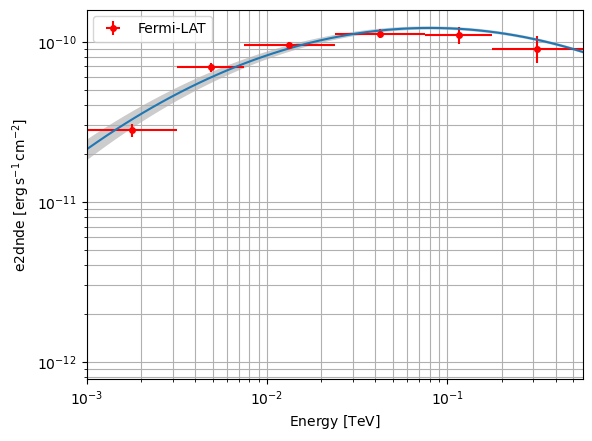

In [43]:
analysis.flux_points[0].plot(sed_type="e2dnde", color="red", label="Fermi-LAT")
analysis.datasets[0].models[config_main.target.source_name].spectral_model.plot(
    sed_type="e2dnde", energy_bounds=[70 * u.MeV, 10 * u.TeV]
)
analysis.datasets[0].models[config_main.target.source_name].spectral_model.plot_error(
    sed_type="e2dnde", energy_bounds=[70 * u.MeV, 10 * u.TeV]
)

plt.grid(which="both")
plt.legend()

In [44]:
hess_fpt = analysis.flux_points[1].to_table(sed_type="e2dnde", formatted=True, format="gadf-sed")
hess_fpt

e_ref,e_min,e_max,e2dnde,e2dnde_err,e2dnde_errp,e2dnde_errn,e2dnde_ul,ts,sqrt_ts,npred,npred_excess,stat,stat_null,stat_scan,is_ul,counts,success,norm_scan
TeV,TeV,TeV,TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),,,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[1],float32[1],float64,float64,float64[11],bool,float64[1],bool,float64[11]
1.259,1.000,1.585,4.861e-11,3.957e-12,4.050e-12,3.865e-12,5.690e-11,573.930,23.957,1078.7338439195892,195.24438,7298.099,7872.030,7542.624 .. 7821.389,False,990.0,True,0.200 .. 5.000
1.995,1.585,2.512,3.850e-11,3.514e-12,3.608e-12,3.422e-12,4.590e-11,501.261,22.389,645.6457274510001,156.32437,5580.359,6081.620,5781.047 .. 5982.961,False,693.0,True,0.200 .. 5.000
3.162,2.512,3.981,2.553e-11,3.094e-12,3.202e-12,2.987e-12,3.215e-11,285.650,16.901,401.83121469412066,90.304184,3606.070,3891.721,3709.918 .. 3896.362,False,396.0,True,0.200 .. 5.000
5.012,3.981,6.310,1.516e-11,2.741e-12,2.885e-12,2.599e-12,2.123e-11,129.069,11.361,237.150408121279,41.4256,2668.394,2797.463,2708.239 .. 2851.453,False,261.0,True,0.200 .. 5.000
7.943,6.310,10.000,1.400e-11,3.227e-12,3.447e-12,3.012e-12,2.135e-11,87.585,9.359,142.67190264643477,25.209143,1635.987,1723.572,1667.583 .. 1702.860,False,145.0,True,0.200 .. 5.000


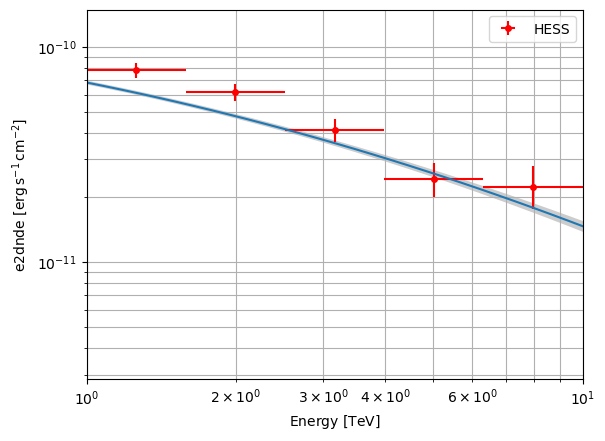

In [45]:
analysis.flux_points[1].plot(sed_type="e2dnde", color="red", label="HESS")
analysis.datasets[1].models[0].spectral_model.plot(sed_type="e2dnde", energy_bounds=[10 * u.GeV, 40 * u.TeV])
analysis.datasets[1].models[0].spectral_model.plot_error(sed_type="e2dnde", energy_bounds=[10 * u.GeV, 40 * u.TeV])

plt.grid(which="both")
plt.legend()

In [46]:
hawc_fpt = analysis.flux_points[2].to_table(sed_type="e2dnde", formatted=True, format="gadf-sed")
hawc_fpt

e_ref,e_min,e_max,e2dnde,e2dnde_err,e2dnde_errp,e2dnde_errn,e2dnde_ul,ts,sqrt_ts,npred,npred_excess,stat,stat_null,stat_scan,is_ul,counts,success,norm_scan
TeV,TeV,TeV,TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),,,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[5],float32[5],float64,float64,float64[11],bool,float64[5],bool,float64[11]
4.214,3.160,5.620,1.532e-11,2.013e-12,2.075e-12,1.951e-12,1.960e-11,128.255,11.325,4353.872111383945 .. 0.0,92.11493 .. 0.0,35149.505,35277.760,35204.743 .. 35628.492,False,4386.0 .. 0.0,True,0.200 .. 5.000
7.497,5.620,10.000,1.082e-11,1.170e-12,1.203e-12,1.138e-12,1.329e-11,241.117,15.528,2294.4846572431934 .. 0.0,60.891956 .. 0.0,37444.208,37685.325,37540.904 .. 38009.092,False,2304.0 .. 0.0,True,0.200 .. 5.000
13.342,10.000,17.800,5.554e-12,9.284e-13,9.708e-13,8.866e-13,7.581e-12,123.686,11.121,464.3356784179106 .. 0.0,10.675275 .. 0.0,17050.381,17174.067,17086.990 .. 17351.425,False,466.0 .. 0.0,True,0.200 .. 5.000
23.717,17.800,31.600,5.116e-12,9.796e-13,1.036e-12,9.248e-13,7.302e-12,113.798,10.668,51.49314560539177 .. 77.32326725387034,1.3301328 .. 7.5209975,7149.970,7263.768,7195.543 .. 7242.365,False,53.0 .. 77.0,True,0.200 .. 5.000


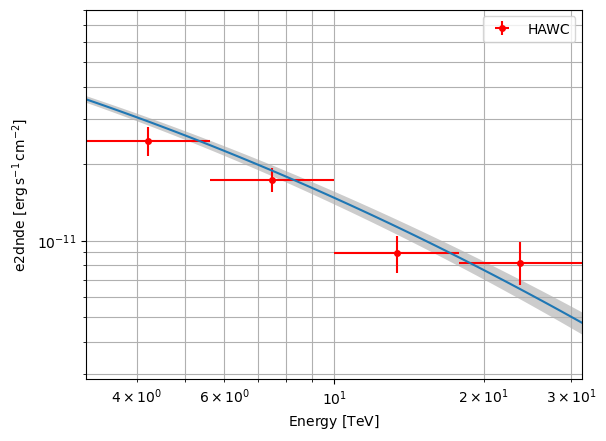

In [47]:
analysis.flux_points[2].plot(sed_type="e2dnde", color="red", label="HAWC")
analysis.datasets[2].models[0].spectral_model.plot(sed_type="e2dnde", energy_bounds=[1 * u.TeV, 40 * u.TeV])
analysis.datasets[2].models[0].spectral_model.plot_error(sed_type="e2dnde", energy_bounds=[1 * u.TeV, 40 * u.TeV])

plt.grid(which="both")
plt.legend()

In [48]:
magic_fpt = analysis.flux_points[3].to_table(sed_type="e2dnde", formatted=True, format="gadf-sed")
magic_fpt

e_ref,e_min,e_max,e2dnde,e2dnde_err,e2dnde_errp,e2dnde_errn,e2dnde_ul,ts,sqrt_ts,npred,npred_excess,stat,stat_null,stat_scan,is_ul,counts,success,norm_scan
TeV,TeV,TeV,TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),,,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[1],float32[1],float64,float64,float64[11],bool,float64[1],bool,float64[11]
0.097,0.078,0.121,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.000,0.000,nan .. nan,False,0.0,False,0.200 .. 5.000
0.151,0.121,0.188,6.334e-11,6.250e-12,6.378e-12,6.126e-12,7.636e-11,160.003,12.649,200.99962486550734,149.66626,0.000,160.003,85.847 .. 813.983,False,201.0,True,0.200 .. 5.000
0.234,0.188,0.292,6.504e-11,6.074e-12,6.233e-12,5.919e-12,7.782e-11,224.371,14.979,147.01335181190757,132.01381,0.000,224.371,123.616 .. 660.497,False,147.0,True,0.200 .. 5.000
0.365,0.292,0.455,7.475e-11,6.918e-12,7.110e-12,6.730e-12,8.936e-11,249.313,15.790,135.999789396278,127.333115,0.000,249.313,157.617 .. 423.487,False,136.0,True,0.200 .. 5.000
0.567,0.455,0.707,4.198e-11,5.729e-12,5.985e-12,5.480e-12,5.447e-11,133.273,11.544,55.99921407927834,54.99921,0.000,133.273,60.413 .. 387.480,False,56.0,True,0.200 .. 5.000
0.882,0.707,1.100,5.794e-11,7.870e-12,8.213e-12,7.536e-12,7.506e-11,128.758,11.347,57.9993360890381,56.332664,0.000,128.758,83.746 .. 170.610,False,58.0,True,0.200 .. 5.000
1.371,1.100,1.710,2.959e-11,6.421e-12,6.881e-12,5.978e-12,4.430e-11,53.345,7.304,21.99970671508574,21.666372,0.000,53.345,24.983 .. 144.872,False,22.0,True,0.200 .. 5.000
2.132,1.710,2.659,2.650e-11,7.082e-12,7.740e-12,6.477e-12,4.337e-11,38.816,6.230,13.976398366486494,13.976398,0.000,38.816,20.704 .. 75.763,False,14.0,True,0.200 .. 5.000


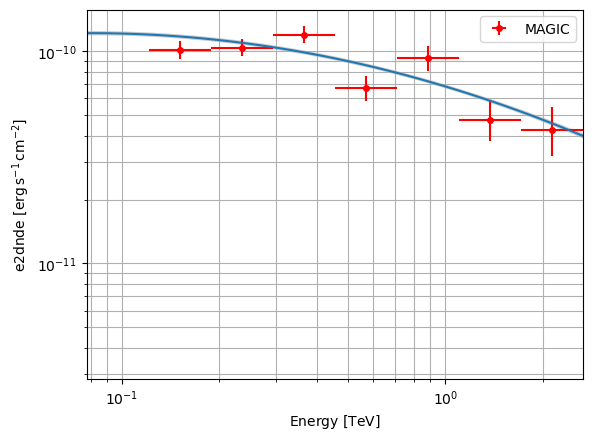

In [49]:
analysis.flux_points[3].plot(sed_type="e2dnde", color="red", label="MAGIC")
analysis.datasets[3].models[0].spectral_model.plot(sed_type="e2dnde", energy_bounds=[10 * u.GeV, 40 * u.TeV])
analysis.datasets[3].models[0].spectral_model.plot_error(sed_type="e2dnde", energy_bounds=[10 * u.GeV, 40 * u.TeV])

plt.grid(which="both")
plt.legend()

In [50]:
lst_fpt = analysis.flux_points[3].to_table(sed_type="e2dnde", formatted=True, format="gadf-sed")
lst_fpt

e_ref,e_min,e_max,e2dnde,e2dnde_err,e2dnde_errp,e2dnde_errn,e2dnde_ul,ts,sqrt_ts,npred,npred_excess,stat,stat_null,stat_scan,is_ul,counts,success,norm_scan
TeV,TeV,TeV,TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),,,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[1],float32[1],float64,float64,float64[11],bool,float64[1],bool,float64[11]
0.097,0.078,0.121,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.000,0.000,nan .. nan,False,0.0,False,0.200 .. 5.000
0.151,0.121,0.188,6.334e-11,6.250e-12,6.378e-12,6.126e-12,7.636e-11,160.003,12.649,200.99962486550734,149.66626,0.000,160.003,85.847 .. 813.983,False,201.0,True,0.200 .. 5.000
0.234,0.188,0.292,6.504e-11,6.074e-12,6.233e-12,5.919e-12,7.782e-11,224.371,14.979,147.01335181190757,132.01381,0.000,224.371,123.616 .. 660.497,False,147.0,True,0.200 .. 5.000
0.365,0.292,0.455,7.475e-11,6.918e-12,7.110e-12,6.730e-12,8.936e-11,249.313,15.790,135.999789396278,127.333115,0.000,249.313,157.617 .. 423.487,False,136.0,True,0.200 .. 5.000
0.567,0.455,0.707,4.198e-11,5.729e-12,5.985e-12,5.480e-12,5.447e-11,133.273,11.544,55.99921407927834,54.99921,0.000,133.273,60.413 .. 387.480,False,56.0,True,0.200 .. 5.000
0.882,0.707,1.100,5.794e-11,7.870e-12,8.213e-12,7.536e-12,7.506e-11,128.758,11.347,57.9993360890381,56.332664,0.000,128.758,83.746 .. 170.610,False,58.0,True,0.200 .. 5.000
1.371,1.100,1.710,2.959e-11,6.421e-12,6.881e-12,5.978e-12,4.430e-11,53.345,7.304,21.99970671508574,21.666372,0.000,53.345,24.983 .. 144.872,False,22.0,True,0.200 .. 5.000
2.132,1.710,2.659,2.650e-11,7.082e-12,7.740e-12,6.477e-12,4.337e-11,38.816,6.230,13.976398366486494,13.976398,0.000,38.816,20.704 .. 75.763,False,14.0,True,0.200 .. 5.000


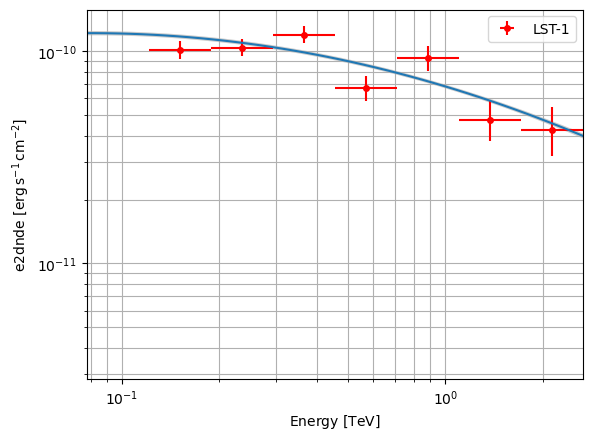

In [51]:
analysis.flux_points[3].plot(sed_type="e2dnde", color="red", label="LST-1")
analysis.datasets[3].models[0].spectral_model.plot(sed_type="e2dnde", energy_bounds=[10 * u.GeV, 40 * u.TeV])
analysis.datasets[3].models[0].spectral_model.plot_error(sed_type="e2dnde", energy_bounds=[10 * u.GeV, 40 * u.TeV])

plt.grid(which="both")
plt.legend()

# Final SED plot with all instruments

(0.0007, 70)

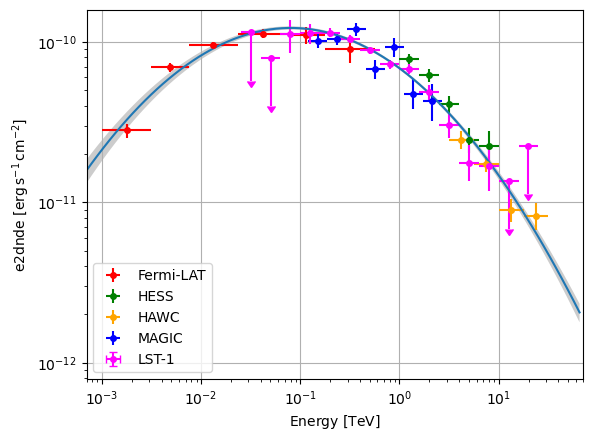

In [53]:
analysis.flux_points[0].plot(sed_type="e2dnde", color="red", label="Fermi-LAT")
analysis.flux_points[1].plot(sed_type="e2dnde", color="green", label="HESS")
analysis.flux_points[2].plot(sed_type="e2dnde", color="orange", label="HAWC")
analysis.flux_points[3].plot(sed_type="e2dnde", color="blue", label="MAGIC")
analysis.flux_points[4].plot(sed_type="e2dnde", color="magenta", label="LST-1")

analysis.datasets[1].models[0].spectral_model.plot(sed_type="e2dnde", energy_bounds=[70 * u.MeV, 70 * u.TeV])
analysis.datasets[1].models[0].spectral_model.plot_error(sed_type="e2dnde", energy_bounds=[70 * u.MeV, 70 * u.TeV])

plt.grid()
plt.legend()
plt.xlim(7e-4, 70)